<a href="https://colab.research.google.com/github/MartinaEchtenbruck/DaLI-Basiskurs/blob/main/Test_Hypothese_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hypothesentest**

In diesem Jupyter Notebook werden wir die Hypothesen, die wir in Modul 2 formuliert haben untersuchen.

Die Durchf√ºhrung von Hypothesentests ist sehr umfangreich. Es w√ºrde jedoch den Rahmen dieser Veranstaltung sprengen, auf alle Themen und Konzepte einzugehen, die mit einem solchen Hypothesentest einhergehen. Daher sind im Folgenden Inhalte, die √ºber den Rahmen dieser Veranstaltung hinausgehen, als **optional** gekennzeichnet. Wer sich f√ºr die Inhalte interessiert, kann hier tiefer in die Materie einsteigen. Die inhaltliche Durchdringung der optionalen Inhalte ist jedoch **nicht notwendig** f√ºr die erfolgreiche Teilnahme an dieser Veranstaltung.

**Bitte beachten** Sie, dass die enthaltenen Codezeilen ausgef√ºhrt werden m√ºssen. Wir empfehlen Ihnen, alle Codezeilen vor der Ausf√ºhrung auszuf√ºhren. W√§hlen Sie dazu im Men√º "Cell" den Punkt "Run all".

---

Um eine wissenschaftliche Untersuchung durchzuf√ºhren, bei der Hypothesen anhand eines Tests untersucht werden, gibt es f√ºr gew√∂hlich einen festen Ablauf mit einzelnen Schritten, die der Reihe nach durchzuf√ºhren sind. √úblicherweise sind dies die folgenden Schritte:


1.   Formulierung der Nullhypothese und der Alternativhypothese
2.   Teststatistik w√§hlen
3.   Signifikanzniveau festlegen
4.   Nullverteilung der Teststatistik bestimmen
5.   Annahme und Ablehnungsbereich f√ºr die Nullhypothese bestimmen
6.   Teststatistik berechnen
7.   Das Ergebnis der Studie gem√§√ü den Vorgaben aus 3. + 5. ermitteln.

Im Folgenden m√∂chten wir unsere aufgestellten Hypothesen nun untersuchen und werden dazu die aufgef√ºhrten Schritte durchf√ºhren.
Versuchen Sie die Schritte nachzuvollziehen und soweit m√∂glich auf Ihre eigenen Hypothesen anzuwenden.

Um unsere Hypothesen im Folgenden zu √ºberpr√ºfen starten wir zun√§chst, wie gehabt, mit dem Einlesen unserer Daten.

### Einlesen der Daten

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

# einlesen der Daten -- so wird es sp√§ter abrufbar sein
#daten = pd.read_csv("UmweltLuftDaten.CSV", sep=';', header=0)

# f√ºr hier ziehen wir es aus dem GitHub
url = 'https://raw.githubusercontent.com/MartinaEchtenbruck/DaLI-Basiskurs/main/UmweltLuftDaten.CSV'
daten = pd.read_csv(url, sep=';', header=0)
daten

Stationscode       Datum Uhrzeit  Feinstaub  Ozon  Stickstoffdioxid  \
0          DENW053  01.11.2020   01:00       13.0  45.0               9.0   
1          DENW053  01.11.2020   02:00       13.0  33.0              13.0   
2          DENW053  01.11.2020   03:00       13.0  28.0              13.0   
3          DENW053  01.11.2020   04:00       13.0  41.0               7.0   
4          DENW053  01.11.2020   05:00       13.0  46.0               7.0   
...            ...         ...     ...        ...   ...               ...   
35039      DENW059  31.10.2021   21:00        6.0  51.0               9.0   
35040      DENW059  31.10.2021   22:00        6.0  59.0               7.0   
35041      DENW059  31.10.2021   23:00        6.0  45.0               NaN   
35042      DENW059  01.11.2021   24:00        6.0  39.0               9.0   
35043      DENW059  01.11.2021   01:00        6.0  30.0              11.0   

      Luftqualit√§tsindex  Temperatur-mean  Temperatur-min  Temperatur-max  \
0               sehr gut             15.5            12.8            18.2   
1               sehr gut             15.5            12.8            18.2   
2               sehr gut             15.5            12.8            18.2   
3               sehr gut             15.5            12.8            18.2   
4               sehr gut             15.5            12.8            18.2   
...                  ...              ...             ...             ...   
35039           sehr gut             13.0             9.0            17.9   
35040           sehr gut             13.0             9.0            17.9   
35041           sehr gut             13.0             9.0            17.9   
35042           sehr gut              NaN             NaN             NaN   
35043           sehr gut              NaN             NaN             NaN   

       Niederschlag  Schneefall  Windrichtung  Windgeschwindigkeit  \
0               2.3         0.0         214.4                 30.5   
1               2.3         0.0         214.4                 30.5   
2               2.3         0.0         214.4                 30.5   
3               2.3         0.0         214.4                 30.5   
4               2.3         0.0         214.4                 30.5   
...             ...         ...           ...                  ...   
35039          11.6         0.0         172.1                 17.0   
35040          11.6         0.0         172.1                 17.0   
35041          11.6         0.0         172.1                 17.0   
35042           NaN         NaN           NaN                  NaN   
35043           NaN         NaN           NaN                  NaN   

       Spitzenwindboe  Luftdruck  Sonnenminuten  
0                63.0     1012.0            0.0  
1                63.0     1012.0            0.0  
2                63.0     1012.0            0.0  
3                63.0     1012.0            0.0  
4                63.0     1012.0            0.0  
...               ...        ...            ...  
35039            78.0     1003.9           71.0  
35040            78.0     1003.9           71.0  
35041            78.0     1003.9           71.0  
35042             NaN        NaN            NaN  
35043             NaN        NaN            NaN  

[35044 rows x 17 columns]

## 1. Formulierung der Nullhypothese und der Alternativhypothese

Als erstes m√∂chten wir uns mit der Frage befassen ob die Tageszeit f√ºr die Feinstaubbelastung einen Unterschied macht. Die folgende Nullhypothese haben wir formuliert:

**Nullhypothese 1**: "*Es gibt keinen Unterschied zwischen der Feinstaubbelastung
der Luft am Tag und in der Nacht*"

Unsere Alternativhypothese lautet:

**Alternativhypothese 1**: "*Es gibt einen Unterschied zwischen der Feinstaubbelastung
der Luft am Tag und in der Nacht (Vermutung: tags√ºber h√∂her).*"




## 2. Teststatistik w√§hlen

Eine Teststatistik ist eine Kennzahl, die aus den Stichprobendaten berechnet wird, um in einem statistischen Hypothesentest eine Entscheidung zu treffen. Sie fasst die Information der Daten in einer Zahl zusammen, anhand derer die Hypothese bewertet wird.

Es gibt verschiedene **m√∂gliche** Testverfahren um diese Teststatistik $S$ zu berechnen:

* Vergleich der Stichprobenmittelwerte (gepaarter t-Test)
* Z√§hlen der Anzahl der Datenpunkte, bei denen die Feinstaubbelastung am Tag h√∂her ist als in der Nacht. (Vorzeichentest)
*   Berechnung ob es einen linearen Zusammenhang zwischen zwei Variablen gibt (Korrelationstest)

Wir betrachten im Folgenden den Vorzeichentest und ermitteln die Anzahl ùëÜ der Datenpaare, bei denen die Feinstaubbelastung am Tag h√∂her ist als in der Nacht. Diesen Wert nennen wir ùëÜ  (f√ºr Test**s**tatistik).

Beispiel: Am 1.11.2020 betr√§gt der Feinstaubwert f√ºr 7 Uhr morgens: $13$ und um 19 Uhr Abends: $11$. Die Differenz zwischen Tag und Nacht betr√§gt also: $13-11=2$. Dieser Wert ist positiv. Wenn wir nur ein einziges Datenpaar auswerten w√ºrden, dann w√§re unser $S$ = 1.

Bevor dieser Wert aber f√ºr uns eine Bedeutung haben kann, m√ºssen wir zun√§chst noch einen Blick auf unsere Experimentdaten werfen. Wieviele Datenpunkte betrachten wir insgesamt?

## **Optional**: Vorbereitung der Datens√§tze

Um die Hypothese zu untersuchen, betrachten wir zwei Gruppen von Feinstaubwerten, n√§mlich die der Feinstaubbelastung am Tag und der in der Nacht.

F√ºr den Vorzeichentest m√ºssen wir allerdings ber√ºcksichtigen, dass paarweise zusammengeh√∂rige Daten ben√∂tigt werden. Da unsere Daten nicht nat√ºrlich paarweise vorliegen m√ºssen wir uns diese Paarungen entsprechend definieren. Eine naheliegende M√∂glichkeit ist es Tag und Nacht entsprechend ihres Verlaufs zusammenzuf√ºhren, also 7 Uhr Morgens mit 19 Uhr Abends und so weiter. Wir f√ºhren dabei Werte des Tages mit der darauffolgenden Nacht derselben Station zusammen.

Die zu bildenden Subsets m√ºssen also paarweise zuordbar sein.
Um diese Subsets bilden zu k√∂nnen m√ºssen wir f√ºr uns zun√§chst definieren was Tag ist und was Nacht. Die Zeitintervalle m√ºssen dabei dieselbe L√§nge haben, um die paarweise zuordbarkeit zu gew√§hrleisten.

Da es zur Definition von Tag und Nacht wohl verschiedene Meinungen gibt, versuchen wir Kernbereiche zu definieren die eindeutig Tag oder Nacht zuzuordnen sind. Im Folgenden w√§hlen wir f√ºr den Tag den Zeitraum zwischen 7 Uhr und 17 Uhr und f√ºr die Nacht den Zeitraum zwischen 19 Uhr und 5 Uhr morgens.

#### Einen Datensatz je Stationscode erstellen

In [2]:
# falls wir verschiedene Stationscodes in den Daten haben, dann erstellen wir die Paarweisen Daten je Stationscode separat
daten['Stationscode'].unique()

array(['DENW053', 'DENW212', 'DENW211', 'DENW059'], dtype=object)

In [3]:
# Ein Set je Stationscode
daten_DENW053 = daten[daten['Stationscode'] == 'DENW053']
daten_DENW212 = daten[daten['Stationscode'] == 'DENW212']
daten_DENW211 = daten[daten['Stationscode'] == 'DENW211']
daten_DENW059 = daten[daten['Stationscode'] == 'DENW059']

# Die Sets nach Tag und Nacht Splitten
daten_tag_DENW053 = daten_DENW053.loc[(daten_DENW053['Uhrzeit'] >= '07:00') & (daten_DENW053['Uhrzeit'] <= '17:00')]
daten_nacht_DENW053 = daten_DENW053.loc[(daten_DENW053['Uhrzeit'] >= '19:00') | (daten_DENW053['Uhrzeit'] <= '05:00')]

daten_tag_DENW212 = daten_DENW212.loc[(daten_DENW212['Uhrzeit'] >= '07:00') & (daten_DENW212['Uhrzeit'] <= '17:00')]
daten_nacht_DENW212 = daten_DENW212.loc[(daten_DENW212['Uhrzeit'] >= '19:00') | (daten_DENW212['Uhrzeit'] <= '05:00')]

daten_tag_DENW211 = daten_DENW211.loc[(daten_DENW211['Uhrzeit'] >= '07:00') & (daten_DENW211['Uhrzeit'] <= '17:00')]
daten_nacht_DENW211 = daten_DENW211.loc[(daten_DENW211['Uhrzeit'] >= '19:00') | (daten_DENW211['Uhrzeit'] <= '05:00')]

daten_tag_DENW059 = daten_DENW059.loc[(daten_DENW059['Uhrzeit'] >= '07:00') & (daten_DENW059['Uhrzeit'] <= '17:00')]
daten_nacht_DENW059 = daten_DENW059.loc[(daten_DENW059['Uhrzeit'] >= '19:00') | (daten_DENW059['Uhrzeit'] <= '05:00')]

# Die Indizes reseten, damit python sich nicht die entstandenen L√ºcken merkt
daten_tag_DENW053 = daten_tag_DENW053.reset_index(drop=True)
daten_nacht_DENW053 = daten_nacht_DENW053.reset_index(drop=True)

daten_tag_DENW212 = daten_tag_DENW212.reset_index(drop=True)
daten_nacht_DENW212 = daten_nacht_DENW212.reset_index(drop=True)

daten_tag_DENW211 = daten_tag_DENW211.reset_index(drop=True)
daten_nacht_DENW211 = daten_nacht_DENW211.reset_index(drop=True)

daten_tag_DENW059 = daten_tag_DENW059.reset_index(drop=True)
daten_nacht_DENW059 = daten_nacht_DENW059.reset_index(drop=True)

#### Datenpaarungen f√ºr Stationscode DENW053 erstellen

In [4]:
print(pd.DataFrame({'Tag-Datum': daten_tag_DENW053['Datum'],
              'Tag-Uhrzeit': daten_tag_DENW053['Uhrzeit'],
              'Nacht-Datum': daten_nacht_DENW053['Datum'],
              'Nacht-Uhrzeit': daten_nacht_DENW053['Uhrzeit']}).head(n=6))

print(pd.DataFrame({'Tag-Datum': daten_tag_DENW053['Datum'],
              'Tag-Uhrzeit': daten_tag_DENW053['Uhrzeit'],
              'Nacht-Datum': daten_nacht_DENW053['Datum'],
              'Nacht-Uhrzeit': daten_nacht_DENW053['Uhrzeit']}).tail(n=6))

    Tag-Datum Tag-Uhrzeit Nacht-Datum Nacht-Uhrzeit
0  01.11.2020       07:00  01.11.2020         01:00
1  01.11.2020       08:00  01.11.2020         02:00
2  01.11.2020       09:00  01.11.2020         03:00
3  01.11.2020       10:00  01.11.2020         04:00
4  01.11.2020       11:00  01.11.2020         05:00
5  01.11.2020       12:00  01.11.2020         19:00
       Tag-Datum Tag-Uhrzeit Nacht-Datum Nacht-Uhrzeit
4010  31.10.2021       13:00  31.10.2021         20:00
4011  31.10.2021       14:00  31.10.2021         21:00
4012  31.10.2021       15:00  31.10.2021         22:00
4013  31.10.2021       16:00  31.10.2021         23:00
4014  31.10.2021       17:00  01.11.2021         24:00
4015         NaN         NaN  01.11.2021         01:00


Da wir f√ºr jede Station alle Werte des Tages gezogen haben Startet jeder unserer Datens√§tze am 1.11.2020 morgens um 1:00 Uhr. Da diese Werte nach unserer Paarung zu den Tag Werten des vorangegangenen Tage geh√∂ren, k√∂nnen wir diese nicht verwenden und verwerfen die Eintr√§ge.
√Ñhnliches liegt am Ende eines jeden Datensatzes vor. Der von uns definierte letzte Tag endet am 31.10.2021 um 17 Uhr. F√ºr die Nacht enden die Werte aber bereits um 1:00 Uhr des Folgetages. Gem√§√ü unserer Paarung haben wir also mehr Werte des letzen Tages als von der letzten Nacht. Wir schneiden auch hier passend ab.

In [5]:
# Die ersten 5 Eintr√§ge der Nacht rauswerfen
daten_nacht_DENW053 = daten_nacht_DENW053.drop([0,1,2,3,4], axis=0, inplace=False)

# die letzten 4 Eintr√§ge des Tages rauswerfen
daten_tag_DENW053 = daten_tag_DENW053.drop([4011,4012,4013,4014], axis=0, inplace=False)

# Den Index zur√ºcksetzen, damit python sich nicht die L√ºcken merkt
daten_nacht_DENW053 = daten_nacht_DENW053.reset_index(drop=True)

In [6]:
pd.DataFrame({'Tag-Datum': daten_tag_DENW053['Datum'],
              'Tag-Uhrzeit': daten_tag_DENW053['Uhrzeit'],
              'Nacht-Datum': daten_nacht_DENW053['Datum'],
              'Nacht-Uhrzeit': daten_nacht_DENW053['Uhrzeit']})


Tag-Datum Tag-Uhrzeit Nacht-Datum Nacht-Uhrzeit
0     01.11.2020       07:00  01.11.2020         19:00
1     01.11.2020       08:00  01.11.2020         20:00
2     01.11.2020       09:00  01.11.2020         21:00
3     01.11.2020       10:00  01.11.2020         22:00
4     01.11.2020       11:00  01.11.2020         23:00
...          ...         ...         ...           ...
4006  31.10.2021       09:00  31.10.2021         21:00
4007  31.10.2021       10:00  31.10.2021         22:00
4008  31.10.2021       11:00  31.10.2021         23:00
4009  31.10.2021       12:00  01.11.2021         24:00
4010  31.10.2021       13:00  01.11.2021         01:00

[4011 rows x 4 columns]

Die Werte passen nun paarweise zusammen. Da f√ºr die anderen Stationscodes der exakt selbe Zeitraum vorliegt, kann hier genau dasselbe vorgehen angewendet werden.

#### Datenpaarungen f√ºr Stationscode DENW212 erstellen

In [7]:
# Die ersten 5 Eintr√§ge der Nacht rauswerfen
daten_nacht_DENW212 = daten_nacht_DENW212.drop([0,1,2,3,4], axis=0, inplace=False)

# die letzten 4 Eintr√§ge des Tages rauswerfen
daten_tag_DENW212 = daten_tag_DENW212.drop([4011,4012,4013,4014], axis=0, inplace=False)

# Den Index zur√ºcksetzen, damit python sich nicht die L√ºcken merkt
daten_nacht_DENW212 = daten_nacht_DENW212.reset_index(drop=True)

pd.DataFrame({'Tag-Datum': daten_tag_DENW212['Datum'],
              'Tag-Uhrzeit': daten_tag_DENW212['Uhrzeit'],
              'Nacht-Datum': daten_nacht_DENW212['Datum'],
              'Nacht-Uhrzeit': daten_nacht_DENW212['Uhrzeit']})

Tag-Datum Tag-Uhrzeit Nacht-Datum Nacht-Uhrzeit
0     01.11.2020       07:00  01.11.2020         19:00
1     01.11.2020       08:00  01.11.2020         20:00
2     01.11.2020       09:00  01.11.2020         21:00
3     01.11.2020       10:00  01.11.2020         22:00
4     01.11.2020       11:00  01.11.2020         23:00
...          ...         ...         ...           ...
4006  31.10.2021       09:00  31.10.2021         21:00
4007  31.10.2021       10:00  31.10.2021         22:00
4008  31.10.2021       11:00  31.10.2021         23:00
4009  31.10.2021       12:00  01.11.2021         24:00
4010  31.10.2021       13:00  01.11.2021         01:00

[4011 rows x 4 columns]

#### Datenpaarungen f√ºr Stationscode DENW211 erstellen



In [8]:
# Die ersten 5 Eintr√§ge der Nacht rauswerfen
daten_nacht_DENW211 = daten_nacht_DENW211.drop([0,1,2,3,4], axis=0, inplace=False)

# die letzten 4 Eintr√§ge des Tages rauswerfen
daten_tag_DENW211 = daten_tag_DENW211.drop([4011,4012,4013,4014], axis=0, inplace=False)

# Den Index zur√ºcksetzen, damit python sich nicht die L√ºcken merkt
daten_nacht_DENW211 = daten_nacht_DENW211.reset_index(drop=True)

pd.DataFrame({'Tag-Datum': daten_tag_DENW211['Datum'],
              'Tag-Uhrzeit': daten_tag_DENW211['Uhrzeit'],
              'Nacht-Datum': daten_nacht_DENW211['Datum'],
              'Nacht-Uhrzeit': daten_nacht_DENW211['Uhrzeit']})

Tag-Datum Tag-Uhrzeit Nacht-Datum Nacht-Uhrzeit
0     01.11.2020       07:00  01.11.2020         19:00
1     01.11.2020       08:00  01.11.2020         20:00
2     01.11.2020       09:00  01.11.2020         21:00
3     01.11.2020       10:00  01.11.2020         22:00
4     01.11.2020       11:00  01.11.2020         23:00
...          ...         ...         ...           ...
4006  31.10.2021       09:00  31.10.2021         21:00
4007  31.10.2021       10:00  31.10.2021         22:00
4008  31.10.2021       11:00  31.10.2021         23:00
4009  31.10.2021       12:00  01.11.2021         24:00
4010  31.10.2021       13:00  01.11.2021         01:00

[4011 rows x 4 columns]

#### Datenpaarungen f√ºr Stationscode DENW059 erstellen

In [9]:
# Die ersten 5 Eintr√§ge der Nacht rauswerfen
daten_nacht_DENW059 = daten_nacht_DENW059.drop([0,1,2,3,4], axis=0, inplace=False)

# die letzten 4 Eintr√§ge des Tages rauswerfen
daten_tag_DENW059 = daten_tag_DENW059.drop([4011,4012,4013,4014], axis=0, inplace=False)

# Den Index zur√ºcksetzen, damit python sich nicht die L√ºcken merkt
daten_nacht_DENW059 = daten_nacht_DENW059.reset_index(drop=True)

pd.DataFrame({'Tag-Datum': daten_tag_DENW059['Datum'],
              'Tag-Uhrzeit': daten_tag_DENW059['Uhrzeit'],
              'Nacht-Datum': daten_nacht_DENW059['Datum'],
              'Nacht-Uhrzeit': daten_nacht_DENW059['Uhrzeit']})

Tag-Datum Tag-Uhrzeit Nacht-Datum Nacht-Uhrzeit
0     01.11.2020       07:00  01.11.2020         19:00
1     01.11.2020       08:00  01.11.2020         20:00
2     01.11.2020       09:00  01.11.2020         21:00
3     01.11.2020       10:00  01.11.2020         22:00
4     01.11.2020       11:00  01.11.2020         23:00
...          ...         ...         ...           ...
4006  31.10.2021       09:00  31.10.2021         21:00
4007  31.10.2021       10:00  31.10.2021         22:00
4008  31.10.2021       11:00  31.10.2021         23:00
4009  31.10.2021       12:00  01.11.2021         24:00
4010  31.10.2021       13:00  01.11.2021         01:00

[4011 rows x 4 columns]

#### Die Datens√§tze wieder zu einem Gesamt-Datensatz zusammensetzen

In [10]:
# Je Stationscode ein DataFrame erstellen mit einer Spalte: Feinstaubwerte am Tag und einer Spalte: Feinstaubwerte in der Nacht
daten_DENW053 = pd.DataFrame({'Feinstaub_Tag': daten_tag_DENW053['Feinstaub'],
                              'Feinstaub_Nacht': daten_nacht_DENW053['Feinstaub']})

daten_DENW212 = pd.DataFrame({'Feinstaub_Tag': daten_tag_DENW212['Feinstaub'],
                              'Feinstaub_Nacht': daten_nacht_DENW212['Feinstaub']})

daten_DENW211 = pd.DataFrame({'Feinstaub_Tag': daten_tag_DENW211['Feinstaub'],
                              'Feinstaub_Nacht': daten_nacht_DENW211['Feinstaub']})

daten_DENW059 = pd.DataFrame({'Feinstaub_Tag': daten_tag_DENW059['Feinstaub'],
                              'Feinstaub_Nacht': daten_nacht_DENW059['Feinstaub']})

# Die vier einzelnen Tabellen zu einer Gesamttabelle mit zwei Spalten zusammen f√ºgen
daten_gesamt = pd.concat([daten_DENW053, daten_DENW212, daten_DENW211, daten_DENW059], axis=0)

# Wir fixen die Zeilennummerierung
daten_gesamt.reset_index(drop=True, inplace=True)
daten_gesamt

Feinstaub_Tag  Feinstaub_Nacht
0               13.0             11.0
1               13.0             10.0
2               13.0             10.0
3               13.0             10.0
4               13.0             10.0
...              ...              ...
16039            9.0              6.0
16040            8.0              6.0
16041            8.0              6.0
16042            8.0              6.0
16043            8.0              6.0

[16044 rows x 2 columns]

Wir haben jetzt den ben√∂tigten Datensatz mit einer Spalte Feinstaubwerte am Tag und einer Spalte Feinstaubwerte in der Nacht so in der Tabelle abgelegt, dass die paarweise zusammengeh√∂rigen Werte jeweils in derselben Zeile liegen.

Nun haben wir die zwei separaten Datensets, jetzt m√ºssen wir sie so zusammenbringen, dass sie wie geplant paarweise zusammenkommen, also Der Eintrag vom 1.11.2020 um 7 Uhr findet zum 1.11.2020 um 19 Uhr und so weiter.

Wie die Ausgabe oben zeigt startet der Datensatz f√ºr die Nacht um 1 Uhr morgens. Damit es zum Datensatz f√ºr den Tag passt, der um 7 Uhr startet, m√ºssen wir die ersten f√ºnf Eintr√§ge vom Nacht-Datensatz rauswerfen:

In der Ausgabe kann man bereits erkennen, dass es nicht √ºberall passt. In Zeile 16055 ist 13 Uhr am 31.10. neben 22 Uhr desselben Tages gelegt worden, es m√ºsste aber 1 Uhr morgens des n√§chsten Tages sein.

## Unsere Experimentdaten

Nach der Vorbereitung der Daten erhalten wir unsere Experimentdaten. Dise sind im DataFrame 'daten_gesamt' abgelegt und umfassen 16044 Datenpaare mit Feinstaubwerten f√ºr den Tag und die Nacht:

In [25]:
daten_gesamt

Feinstaub_Tag  Feinstaub_Nacht  Feinstaub_Differenz
0               13.0             11.0                  2.0
1               13.0             10.0                  3.0
2               13.0             10.0                  3.0
3               13.0             10.0                  3.0
4               13.0             10.0                  3.0
...              ...              ...                  ...
16039            9.0              6.0                  3.0
16040            8.0              6.0                  2.0
16041            8.0              6.0                  2.0
16042            8.0              6.0                  2.0
16043            8.0              6.0                  2.0

[16044 rows x 3 columns]

## 3. Signifikanzniveau festlegen

Mit einem Hypothesentest kann die Nullhypothese nie mit 100%iger Sicherheit verworfen oder best√§tigt werden. Es besteht immer eine Irrtumswahrscheinlichkeit. Das liegt daran, dass f√ºr die Analyse immer eine Stichprobe aus der Grundgesamtheit gezogen wird.

Wir haben unsere Stichprobe so festgelegt, dass wir die st√ºndlichen Werte von 4 K√∂lner Messstationen √ºber den Zeitraum eines Jahres betrachten. Eine andere Stichprobe (z.B. ein anderes Jahr oder eine andere Messstation) liefert vielleicht andere Ergebnisse. Daher ist jede Aussage √ºber eine Hypothese immer mit einer Irrtumswahrscheinlichkeit behaftet.

Diese Irrtumswahrscheinlichkeit wird als Signifikanzniveau ($Œ±$) bezeichnet.
Das **Signifikanzniveau** wird immer vor der Analyse bestimmt. Es liegt h√§ufig zwischen 1&#8239;% und 5&#8239;%. Bei einem Signifikanzniveau von 5&#8239;% ($Œ±=0,05$) besteht ein Risiko von 5&#8239;%, dass die Nullhypothese verworfen wird, obwohl sie eigentlich wahr ist.

F√ºr diese Untersuchung legen wir das Signifikanzniveau auf $Œ±=0,05$.




## 6. Teststatistik berechnen

Der Nachvollziehbarkeit halber weichen wir hier ein wenig von der √ºblichen Reihenfolge ab und berechnen zun√§chst die Teststatistik $S$.

$S$ haben wir uns zuvor definiert als: die Anzahl der Datenpunkte, bei denen die Feinstaubbelastung am Tag h√∂her ist als in der Nacht. Wir berechnen als zun√§chst die Differenz zwischen den Tag- und Nachtwerten:

In [12]:
daten_gesamt['Feinstaub_Differenz'] = daten_gesamt['Feinstaub_Tag'] - daten_gesamt['Feinstaub_Nacht']

daten_gesamt.head(n=10)

Feinstaub_Tag  Feinstaub_Nacht  Feinstaub_Differenz
0           13.0             11.0                  2.0
1           13.0             10.0                  3.0
2           13.0             10.0                  3.0
3           13.0             10.0                  3.0
4           13.0             10.0                  3.0
5           12.0             10.0                  2.0
6           12.0             10.0                  2.0
7           12.0             10.0                  2.0
8           12.0             10.0                  2.0
9           12.0              9.0                  3.0

Nun k√∂nnen wir die Anzahl $S$ der positiven differenzen z√§hlen:

In [13]:
# Z√§hle, wie oft die Differenz positiv ist
positiv = (daten_gesamt['Feinstaub_Differenz'] > 0).sum()
negativ = (daten_gesamt['Feinstaub_Differenz'] < 0).sum()
null = (daten_gesamt['Feinstaub_Differenz'] == 0).sum()

# Ausgabe der Ergebnisse
print(f"Bei {positiv} Datenpaaren ist die Feinstaubbelastung am Tag gr√∂√üer als in der Nacht.")
print(f"Bei {null} Datenpaaren ist die Feinstaubbelastung am Tag gleich der in der Nacht.")
print(f"Bei {negativ} Datenpaaren ist die Feinstaubbelastung am Tag kleiner als in der Nacht.")

Bei 6772 Datenpaaren ist die Feinstaubbelastung am Tag gr√∂√üer als in der Nacht.
Bei 2168 Datenpaaren ist die Feinstaubbelastung am Tag gleich der in der Nacht.
Bei 6833 Datenpaaren ist die Feinstaubbelastung am Tag kleiner als in der Nacht.


Nun liegt uns die Teststatistik $S$, die Anzahl der Datenpunkte, bei denen die Feinstaubbelastung am Tag h√∂her ist als in der Nacht, vor:

$S$ = 6772

## Erste Betrachtung des Ergebnisses

Unsere Experimentdaten umfassen 16044 Datenpaare. Davon sind bei 6772 Datenpaaren die Werte f√ºr den Tag gr√∂√üer als f√ºr die Nacht (positive Differenz). Damit erhalten wir f√ºr unsere Teststatistik den Wert: $S=6772$, die Anzahl der positiven Differenzen.

Die positiven Differenzen k√∂nnten jetzt allerdings durch nat√ºrliche Schwankungen zu erkl√§ren sein (zuf√§lliges Rauschen) oder dadurch, dass es vielleicht doch einen Unterschied zwischen der Feinstaubbelastung am Tag und in der Nacht gibt.

Wir m√ºssen nun herausfinden, ob der von uns ermittelte Wert $S$ auf ein zuf√§lliges Rauschen zur√ºckzuf√ºhren ist und wir die Nullhypothese nicht verwerfen k√∂nnen oder ob dieser Wert ausreicht, um zu belegen, dass es einen Unterschied zwischen der Feinstaubbelastug am Tag und in der Nacht gibt. Daf√ºr schauen wir uns die Nullverteilung an.



## 4. Nullverteilung der Teststatistik bestimmen

Die Nullverteilung zeigt, wie wahrscheinlich das Auftreten eines bestimmten Wertes f√ºr $S$ ist, unter der Annahme, dass die Nullhypothese wahr ist bzw. dass die Schwankungen im Vorzeichen auf Zufall beruhen. Die Nullverteilung ist also eine Wahrscheinlichkeitsverteilung.

Die Nullverteilung des Vorzeichentests folgt einer **Binomialverteilung**, da der Vorzeichentest im Wesentlichen auf dem Z√§hlen von Erfolgen (positiven Differenzen) und Misserfolgen (negativen Differenzen) basiert, die zwei m√∂gliche Ergebnisse darstellen ‚Äì √§hnlich wie bei einem binomialen Zufallsexperiment.

Die Binomialverteilung ist eine der wichtigsten diskreten Wahrscheinlichkeitsverteilungen. Sie beschreibt die Wahrscheinlichkeiten f√ºr die Anzahl der Erfolge in einer Serie von gleichartigen Experimenten, die nur 2 m√∂gliche Ergebnisse haben. Man nennt diese Art von Experimenten auch Binomischen Zufallsexperiment (oder Bernoulli Experiment).

#### **Optional**: Binomialverteilung (Hintergrund & Erkl√§rung)

Dies sind die Eigenschaften eines Binomischen Zufallsexperiments wie bspw. dem M√ºnzwurf:

*   **Anzahl der Versuche**: Man f√ºhrt ein Experiment **n**-mal durch (z. B. man wirft  10-mal eine M√ºnze).
*   **Zwei m√∂gliche Ergebnisse**: Bei jedem Experiment gibt es **nur zwei m√∂gliche Ergebnisse**: Erfolg oder Misserfolg (z. B. Kopf oder Zahl bei einer M√ºnze). Der Erfolg muss nicht unbedingt ‚Äûgut‚Äú sein; es geht nur darum, ein bestimmtes Ergebnis zu z√§hlen.
*   **Wahrscheinlichkeit eines Erfolgs**: Die Wahrscheinlichkeit eines Erfolgs bei jedem einzelnen Versuch ist immer dieselbe (z. B. bei einer fairen M√ºnze liegt die Wahrscheinlichkeit Zahl zu werfen bei 50% f√ºr Kopf).
*   **Z√§hlung der Erfolge**: Die Binomialverteilung sagt dir, wie wahrscheinlich es ist, dass du in diesen n Versuchen genau k Erfolge erzielst (z. B. wie wahrscheinlich es ist, bei 10 M√ºnzw√ºrfen genau 7-mal Kopf zu bekommen).

Die Wahrscheinlichkeit, genau k Erfolge in n Versuchen zu bekommen, wird durch die Binomialformel berechnet.

Wer sich weiter in die Binomialverteilung einlesen m√∂chte kann dies hier tun:
*   https://de.wikipedia.org/wiki/Binomialverteilung
*   https://studyflix.de/statistik/binomialverteilung-1118

Anschaulich l√§sst sich die Binomialverteilung anhand eines Galtonbetretts herleiten. Das Galtonbrett gleicht dabei einem Kugelspiel, bei dem man die Kugel oben in das Spiel wirft. Das Spiel hat **n** Ebenen mit **n** Hindernissen (wie bspw. einen Nagel) auf den die Kugel st√∂√üt und daraufhin mit einer Wahrscheinlichkeit von 50 % nach rechts bzw. nach links f√§llt.
Betrachtet man alle m√∂glichen Wege, die die Kugel dabei nehmen kann, dann kann man hieraus auch die Wahrscheinlichkeit ableiten, mit der ein bestimmtes ùëÜ (die Kugel f√§llt nach rechts) auftritt.

Das Galtonbrett ist eine sehr anschauliche Methode die Binomialverteilung zu erkl√§ren. Wer mehr zum Galtonbrett lesen m√∂chte kann diese hier tun:
*   https://de.wikipedia.org/wiki/Galtonbrett



#### **Optional**: Binomialverteilung am kleinen Beispiel

Um diese Verteilung besser verstehen zu k√∂nnen schauen wir uns zun√§chst die Binomialverteilung f√ºr p=0,5 und n=10 an. Dies entspr√§che f√ºr unser Experiment der Fragestellung: Wir vergleichen 10 Datenpaare der Feinstaubbelastung, unter der Annahme, dass es keinen Unterschied in der Feinstaubbelastung am Tag und in der Nacht gibt: wie wahrscheinlich ist es, dass die differenz k-mal oder √∂fters positiv ist?

Der folgende Code berechnet uns die zugeh√∂rige Binomialverteilung und erstellt einen Plot der berechneten Wahrscheinlichkeiten:

[0.00097656 0.00976563 0.04394531 0.1171875  0.20507812 0.24609375
 0.20507812 0.1171875  0.04394531 0.00976563 0.00097656]


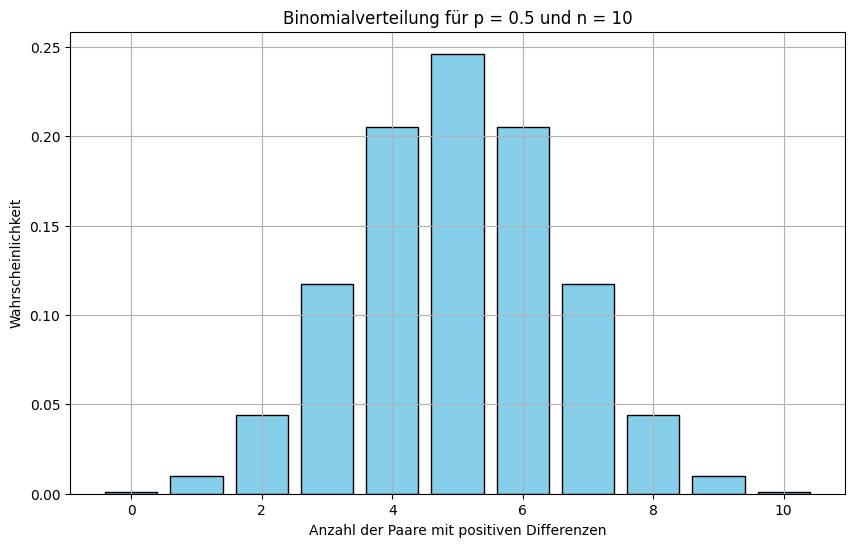

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameter der Binomialverteilung
n = 10  # Anzahl der Versuche
wkeit = 0.5    # Wahrscheinlichkeit f√ºr Erfolg

# Welche m√∂glichen Ergebnisse kann das Experiment haben?
# Erstelle einen Vektor mit den Werten von 0 bis 10
S = np.arange(0, n+1)

# Berechnung der Binomialverteilung
# Wie zuvor beschrieben ist die Binomialverteilung √ºber eine Formel berechenbar.
# Die Funktion pmf im scipy.stats Paket berechnet die Wahrscheinlichkeiten f√ºr
# die verschiedenen Werte, die S annehmen k√∂nnte unter Angabe der
# Anzahl Versuche (n) und der Wahrscheinlichkeit (wkeit) f√ºr einen Erfolg.
binom_dist_klein = binom.pmf(S, n, wkeit)

print(binom_dist_klein)

# Die folgenden Zeilen erstellen den Plot, der die Wahrscheinlichkeiten f√ºr das
# Auftreten eines bestimmten Wertes f√ºr S zeigt.
plt.figure(figsize=(10, 6))
plt.bar(S, binom_dist_klein, width=0.8, color='skyblue', edgecolor='black')
plt.title(f'Binomialverteilung f√ºr p = {wkeit} und n = {n}')
plt.xlabel('Anzahl der Paare mit positiven Differenzen')
plt.ylabel('Wahrscheinlichkeit')
plt.grid(True)
plt.show()

Der Plot zeigt, mit welcher Wahrscheinlichkeit bei unserem Experiment ein bestimmter Wert f√ºr $S$ herauskommt, unter der Annahme, dass die Nullhypothese gilt.

F√ºr unser Mini-Experiment, bei dem wir nur 10 Datenpaare betrachten, gibt es 11 M√∂gliche Werte, die unser $S$ annehmen kann: 0, 1, 2, ..., 10.
Wenn die Nullhypthese zutrifft, dann sind Ergebnisse f√ºr $S$ von etwa 4,5 oder 6 am wahrscheinlichsten. Abweichungen zu den Randbereichen in beiden Richtungen sind unwahrscheinlicher.

In [15]:
# Die zugeh√∂rigen Werte sind in dem array 'binom_dist_klein' hinterlegt.
# Wir lassen uns die dargestellten Werte ausgeben:

print("  S    Wahrscheinlichkeit")
print("------------")
for i, wkeit in enumerate(binom_dist_klein):
    # Gib i zweistellig aus und die Wahrscheinlichkeitswerte mit 6 Stellen
    # vor und 2 nach dem Komma
    print(f"{i:2} {wkeit*100:6.2f} %")

  S    Wahrscheinlichkeit
------------
 0   0.10 %
 1   0.98 %
 2   4.39 %
 3  11.72 %
 4  20.51 %
 5  24.61 %
 6  20.51 %
 7  11.72 %
 8   4.39 %
 9   0.98 %
10   0.10 %


Mithilfe der Binomialverteilung l√§sst sagen, mit welcher Wahrscheinlichkeit ein bestimmtes $S$ zu erwarten ist. In der vorangegangenen Ausgabe sind die Wahrscheinlichkeiten f√ºr alle m√∂glichen Werte, die $S$ annehmen k√∂nnte aufgelistet. Die Summer dieser Wahrscheinlichkeiten ist immer 1.

Angenommen die Frage lautet: "Wie wahrscheinlich ist es, dass die Differenz in 8 oder mehr F√§llen positiv ist?" Dann erhalten wir die Antwort durch die Aufsummierung der letzten drei Balken:

Die Werte sind: 0,0439 + 0,0098 + 0,001 = 0,0547 und das entspricht einer Wahrscheinlichkeit von 5,47%, dass, unter Annahme der Nullhypothese, ein $S$ von 8 oder gr√∂√üer auftritt.

#### Nullverteilung der Teststatistik bestimmen

Im Falle unseres Experimentes betrachten wir einen Datensatz von 16044 Datenpaaren. Die Nullverteilung liegt der Annahme zugrunde, dass die Nullhypothese stimmt. Das bedeutet, dass positive und negative Vorzeichen bei der Differenzbildung nur dem Zufall zuzuschreiben sind und wir also mit gleicher Wahrscheinlichkeit positive wie negative Vorzeichen erwarten (wkeit=0,5).

Der folgende Code generiert die Binomialverteilung f√ºr unser Experiment:

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameter der Binomialverteilung
n = positiv+negativ  # Anzahl der Versuche
wkeit = 0.5    # Wahrscheinlichkeit f√ºr Erfolg

# Welche m√∂glichen Ergebnisse kann das Experiment haben?
# Erstelle einen Vektor mit den Werten von 0 bis 16044
x = np.arange(0, n+1)

# Berechnung der Binomialverteilung
# Wie zuvor beschrieben ist die Binomialverteilung √ºber eine Formel berechenbar.
# Die Funktion pmf im scipy.stats Paket berechnet die Wahrscheinlichkeiten f√ºr
# die verschiedenen Werte, die S annehmen k√∂nnte unter Angabe der
# Anzahl Versuche (n) und der Wahrscheinlichkeit (wkeit) f√ºr einen Erfolg.
binom_dist = binom.pmf(x, n, wkeit)

#### Nullverteilung plotten

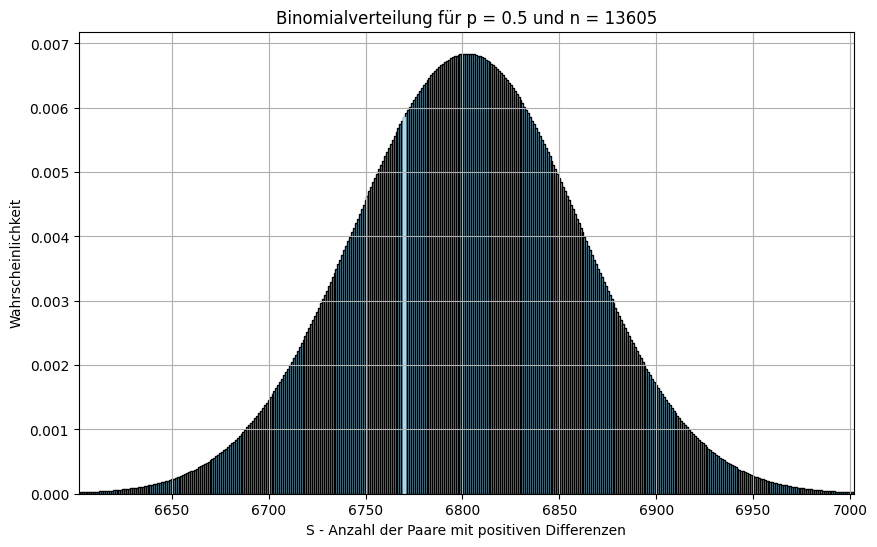

In [17]:
# Plot des Balkendiagramms
plt.figure(figsize=(10, 6))
plt.bar(x, binom_dist, width=1.0, color='skyblue', edgecolor='black')

# Den Balken bei Index 6770 rot markieren
plt.bar(x[6770], binom_dist[6770], width=1.0, color='lightblue', edgecolor='lightblue')

plt.title(f'Binomialverteilung f√ºr p = {wkeit} und n = {n}')
plt.xlabel('S - Anzahl der Paare mit positiven Differenzen')
plt.ylabel('Wahrscheinlichkeit')

# Wir Zoomen auf den Mittleren Bereichs des Plots, da die Wahrscheinlichkeiten
# weiter ausserhalb aufgrund der sehr gro√üen Datenmengen sehr schnell sehr klein
# werden.
# Die folgende Zeile auskommentieren um den gesamten Plot zu sehen:
plt.xlim(n//2 - 200, n//2 + 200)

# Mit der folgenden Zeile kann man den angezeigten Bereich der Y-Achse festlegen
#plt.ylim(0, 0.00000025)

plt.grid(True)
plt.show()

Der Plot zeigt die Nullverteilung der Teststatistik. Die Wahrscheinlichkeit f√ºr ein $S$ von 6770 ist im Plot hellblau markiert.

## 5. Annahme und Ablehungsbereich f√ºr die Nullhypothese bestimmen

Mit der Festlegung des Signifikanzniveaus auf $Œ±=0,05$ sagen wir, dass wir einen Unterschied in der Feinstaubbelastung zwischen Tag und Nacht annehmen (also die Nullhypothese verwerfen), wenn die Wahrscheinlichkeit f√ºr einen reinen Zufallsbefund kleiner als das Signifikanzniveau, also z.‚ÄâB. 5‚Äâ% ist.

F√ºr welche Werte von ùëÜ trifft das zu?


#### **Optional**: Annahme und Ablehnungsbereich am kleinen Beispiel

Wir schauen uns zun√§chst noch einmal unser stark reduziertes Problem an, in dem wir nur 10 Datenpunkte betrachten. Im Abschnitt "Binomialverteilung am kleinen Beispiel" haben wir die Wahrscheinlichkeiten f√ºr die verschiedenen Werte die $S$ in diesem Fall annehmen kann bereits bestimmt. Sie sind in der Variable binom_dist_klein hinterlegt.

Unser Signifikanzniveau haben wir auf $\alpha=0,5$ festgelegt.

Mit diesem Wissen k√∂nnen wir nun unsere zuletzt formulierte Frage beantworten.
Die Nullhypothese wird abgelehnt, wenn unser Experiment einen Wert f√ºr $S$ erzielt, bei dem gilt, dass die Wahrscheinlichkeit einen solchen oder extremeren Wert zu erzielen, kleiner als 5% ist.

Wir summieren die Werte vom Rand her auf um zu schauen wie weit wir gehen k√∂nnen, bevor wir die 5% √ºberschreiten. Achtung: wir m√ºssen beide Randbereiche ber√ºcksichtigen.

In [18]:
# Wir betrachten die beiden Falle, dass S=0 oder dass S=10 ist.
# Die Summe der Wahrscheinlichkeiten f√ºr diese beiden F√§lle
# k√∂nnen wir wie folgt berechnen:
wkeit_0_10 = binom_dist_klein[0] + binom_dist_klein[10]
print(f"Die Wahrscheinlichkeit, das S=0 oder S=10 ist betr√§gt: {wkeit_0_10}")

# Bei 0 und 10 sind wir eindeutig noch im Ablehnungsbreich. Wir nehmen noch
# die Wahrscheinlichkeiten f√ºr 1 und 9 mit auf:
wkeit_0_1_9_10 = binom_dist_klein[0] + binom_dist_klein[1] + binom_dist_klein[9] + binom_dist_klein[10]
print(f"Die Wahrscheinlichkeit, das S <= 1 oder S>=9 ist betr√§gt: {wkeit_0_1_9_10}")

# Auch damit sind wir noch im Ablehnungsbereich. Wir nehmen noch die 2 und
# die 8 hinzu:
wkeit_0_1_2_8_9_10 = binom_dist_klein[0] + binom_dist_klein[1] + binom_dist_klein[2] + binom_dist_klein[8] + binom_dist_klein[9] + binom_dist_klein[10]
print(f"Die Wahrscheinlichkeit, das S<=2 oder S>=8 ist betr√§gt: {wkeit_0_1_2_8_9_10}")

print("\nHier haben wir die 5% eindeutig √ºberschritten. Wir wissen jetzt, \ndass wir unsere Nullhypothese in diesem Fall ablehnen, wenn wir \nein S aus {0,1,9,10} erhalten.")

Die Wahrscheinlichkeit, das S=0 oder S=10 ist betr√§gt: 0.001953124999999999
Die Wahrscheinlichkeit, das S <= 1 oder S>=9 ist betr√§gt: 0.021484375
Die Wahrscheinlichkeit, das S<=2 oder S>=8 ist betr√§gt: 0.10937500000000008

Hier haben wir die 5% eindeutig √ºberschritten. Wir wissen jetzt, 
dass wir unsere Nullhypothese in diesem Fall ablehnen, wenn wir 
ein S aus {0,1,9,10} erhalten.


So sieht es aus, wenn wir die Summen von Hand berechnen. Bei gro√üen Experimenten verwenden wir stattdessen eine Funktion, die uns die kumulierten Summen berechnet:

In [19]:
# Das Paket numpy hat die Funktion cumsum, die die Betr√§ge kumuliert:
binom_dist_cumsum = np.cumsum(binom_dist_klein)

# Wir lassen uns die berechneten Werte ausgeben:

print("  S    Kumulierte Wahrscheinlichkeit")
print("------------")
for i, summe in enumerate(binom_dist_cumsum):
    # Gib i zweistellig aus und die Wahrscheinlichkeitswerte mit 6 Stellen
    # vor und 2 nach dem Komma
    print(f"{i:2} {summe*100:6.2f} %")

  S    Kumulierte Wahrscheinlichkeit
------------
 0   0.10 %
 1   1.07 %
 2   5.47 %
 3  17.19 %
 4  37.70 %
 5  62.30 %
 6  82.81 %
 7  94.53 %
 8  98.93 %
 9  99.90 %
10 100.00 %


Hier k√∂nnen wir jetzt direkt ablesen, dass bei S=2 die Kumulierte Wahrscheinlichkeit die 2,5% bereits √ºberschritten hat. Da die Funktion symmetrisch ist haben wir, zusammen mit dem oberen Randbereich, bei S=2 oder S=8, unsere also 5% bereits √ºberschritten.

Unser Ablehungsbereich ist also $S={0,1,9,10}$.
Der folgende Plot zeigt den Ablehnungsbereich f√ºr unser kleines Beispiel mit rot markierten Balken.

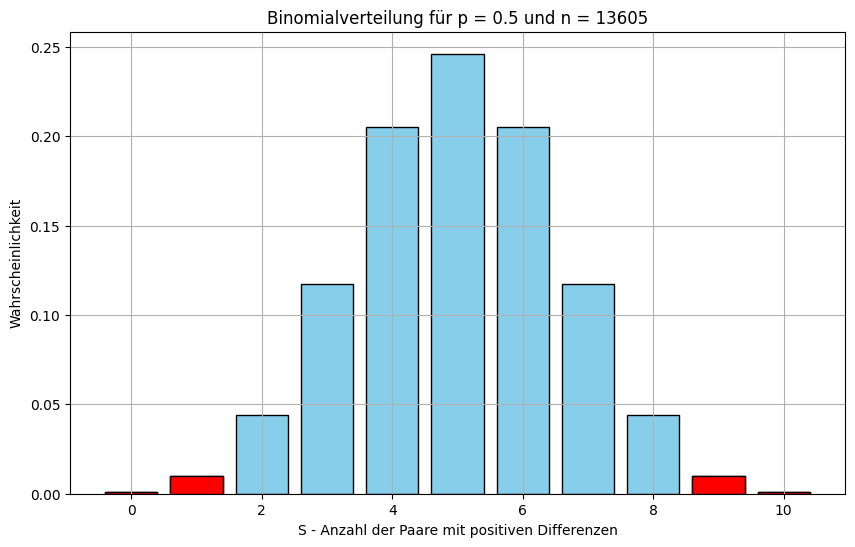

In [20]:
# Die folgenden Zeilen erstellen den Plot, der die Wahrscheinlichkeiten f√ºr das
# Auftreten eines bestimmten Wertes f√ºr S zeigt.
plt.figure(figsize=(10, 6))
plt.bar(S, binom_dist_klein, width=0.8, color='skyblue', edgecolor='black')

# Den Ablehnungsbereich rot markieren
plt.bar(x[0], binom_dist_klein[0], width=0.8, color='red', edgecolor='black')
plt.bar(x[1], binom_dist_klein[1], width=0.8, color='red', edgecolor='black')
plt.bar(x[9], binom_dist_klein[9], width=0.8, color='red', edgecolor='black')
plt.bar(x[10], binom_dist_klein[10], width=0.8, color='red', edgecolor='black')

plt.title(f'Binomialverteilung f√ºr p = {wkeit} und n = {n}')
plt.xlabel('S - Anzahl der Paare mit positiven Differenzen')
plt.ylabel('Wahrscheinlichkeit')
plt.grid(True)
plt.show()

#### Annahme und Ablehnungsbereich bestimmen


Wie auch im kleinen Beispiel m√ºssen wir auch hier die Werte vom Rand her aufsummieren um zu schauen wie weit wir gehen k√∂nnen, bevor wir die 5% √ºberschreiten. Da wir hier sehr viele Werte betrachten m√ºssen, machen wir dies nicht von Hand. Stattdessen berechen wir die kumulierten Summen direkt f√ºr alle Werte und schauen dann, ann welcher Stelle wir die 2,5% am unteren und die 97,5% am oberen Rand der Kurve √ºberschreiten.

In [21]:
# Das Paket numpy hat die Funktion cumsum, die die Betr√§ge kumuliert:
binom_dist_cumsum = np.cumsum(binom_dist)

# Nun m√ºssen wir schauen, wann die kumulierten Wahrscheinlichkeiten die 2,5%
# √ºberschreiten:
# Bestimmen des ersten Index, an dem der Wert gr√∂√üer als 0,025 ist
first_index_greater_than_0_025 = np.argmax(binom_dist_cumsum > 0.025)

print(first_index_greater_than_0_025)

last_index_smaller_than_0_975 = np.argmin(binom_dist_cumsum < 0.975)

print(last_index_smaller_than_0_975)


6688
6917


Bei 6688 sind die 2,5% √ºberschritten. Da die Funktion Symmetrisch ist, haben wir am oberen Rand der Kurve die 2,5% an derselben Stelle (13605-6688=6917) auch √ºberschritten.

Der Ablehnungsbereich ist also der Bereich f√ºr $S=[0;6688]~ \cup ~[6917;16044]$.
Der folgende Plot zeigt diesen Bereich in rot markiert.

S betrachten.

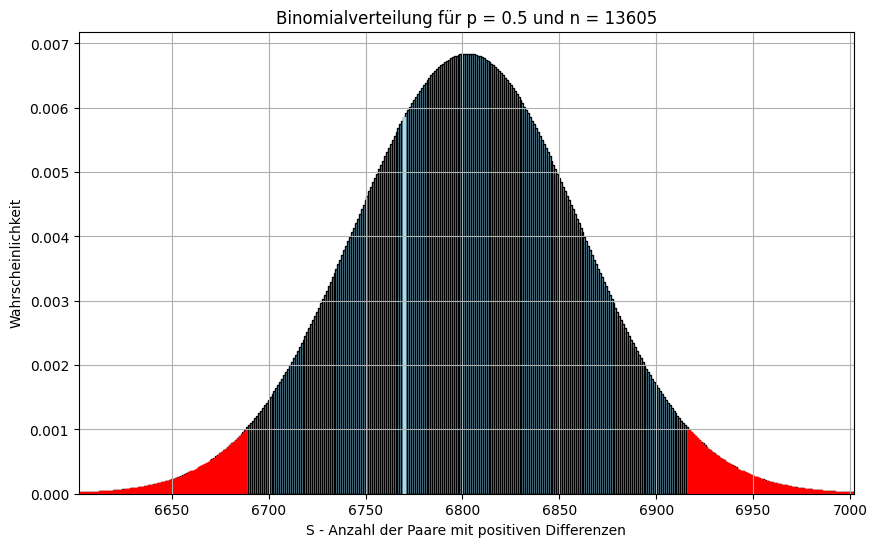

In [22]:
# Plot des Balkendiagramms
plt.figure(figsize=(10, 6))
plt.bar(x, binom_dist, width=1.0, color='skyblue', edgecolor='black')

# Den Ablehnungsbereich rot markieren
plt.bar(x[0:6689], binom_dist[0:6689], width=0.8, color='red', edgecolor='red')
plt.bar(x[6917:16045], binom_dist[6917:16045], width=0.8, color='red', edgecolor='red')

# Den Balken bei Index 6770 blau markieren
plt.bar(x[6770], binom_dist[6770], width=1.0, color='lightblue', edgecolor='lightblue')


plt.title(f'Binomialverteilung f√ºr p = {wkeit} und n = {n}')
plt.xlabel('S - Anzahl der Paare mit positiven Differenzen')
plt.ylabel('Wahrscheinlichkeit')

# Wir Zoomen auf den Mittleren Bereichs des Plots, da die Wahrscheinlichkeiten
# weiter ausserhalb aufgrund der sehr gro√üen Datenmengen sehr schnell sehr klein
# werden.
# Die folgende Zeile auskommentieren um den gesamten Plot zu sehen:
plt.xlim(n//2 - 200, n//2 + 200)

# Mit der folgenden Zeile kann man den angezeigten Bereich der Y-Achse festlegen
#plt.ylim(0, 0.00000025)

plt.grid(True)
plt.show()

Unser Ablehnungsbereich ist im obigen plot nun rot markiert. Wenn wir beim ausz√§hlen der positiven Differenzen ein $S$ erhalten h√§tten das in in diesen Bereich f√§llt, dann h√§tten wir die Nullhypothese verwerfen k√∂nnen und unsere Alternativhypothese annehmen k√∂nnen.
Unser $S=6770$ ist im Plot hellblau markiert und liegt nicht im Ablehnungsbereich, d.h. wir k√∂nnen die Nullhypothese nicht ablehnen.

Aus diesem Experiment erhalten wir keinen Erkenntnisgewinn, denn wir k√∂nnen die Nullhypothese auch nicht als richtig annehmen. Es bleibt uns nur, die Daten zu pr√ºfen, unser Experimentensetting zu √ºberdenken oder unser Alternativhypothese neu zu formulieren.